In [18]:
import numpy as np

# The Perceptron Learning Algorithm

This is the code for problems 6-9 of Homework 1 of Learning From Data. It's not very good but it does the job.

In [21]:
number_of_points = 100
number_of_runs = 1000
iters = np.empty(number_of_runs)
GE = np.empty(number_of_runs)

for i in range(number_of_runs):
    # create target function
    target = np.random.uniform(-1,1,[2,2]) # create two random points to define line
    
    
    
    
    # generate inputs
    inputs = np.random.uniform(-1,1,[number_of_points,2])

    # generate classification
    def side(points, line):
        """Returns the side of the line the points are on."""
        return np.sign((points[:,0] - line[0,0]) * (line[1,1] - line [0,1]) - (points[:,1] - line[0,1]) * (line[1,0] - line[0,0])).astype('int_')

    classification = side(inputs, target)
    side1 = inputs[classification>0]
    side2 = inputs[classification<=0]

    # Perceptron Learning Algorithm
    augmented = np.concatenate([np.ones([number_of_points,1]), inputs], axis=1) # add 1 as X_0 to match setup in book
    w = np.zeros(3) # initialize weights
    correct = np.full([1,number_of_points],False)
    iterations = 0 # track iteratison
    while True:
    
        hypothesis = np.sign(np.dot(w, np.transpose(augmented))).astype('int_')
        correct = (hypothesis == classification)
    
        # check if done
        if correct.all():
            break
    
        misclass = augmented[~correct][0] #TODO: Make actually random
    
        #update w
        w = w + classification[~correct][0] * misclass
        iterations += 1
    
    # add number of iterations to the list
    iters[i] = iterations
    
    # compute P[f(x) != g(x)] (we will estimate for now)
    test_data = np.random.uniform(-1,1,[500, 2]) # generate sample data
    
    # calculate correct classification
    # we have to do this now because side doesn't deal with the added 1's
    proper = side(test_data, target)
    
    test_data = np.concatenate([np.ones([500,1]), test_data], axis=1) # add 1's
    hypoth = np.sign(np.dot(w, np.transpose(test_data))).astype('int_') # calculate h(x)
    
    incorrect = hypoth != proper
    GE[i] = incorrect.mean()



print("Average number of iterations for N = " + str(number_of_points) + ": " + str(iters.mean()))
print("Generalization error for N = " + str(number_of_points) + ": " + str(GE.mean()))

Average number of iterations for N = 100: 199.127
Generalization error for N = 100: 0.013594000000000002


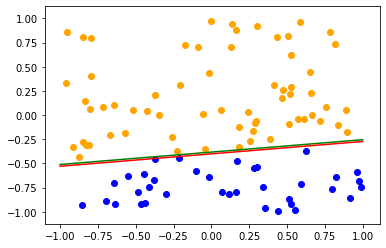

In [22]:
# This is code for plotting the results of the PLA
# I used this while working on the algorithm to help me visualize the process and to verify things were working.
# It is no longer necessary since the cell above does all the work but I'm leaving it here for reference
# and because it's a nice visualization.

%matplotlib inline
import matplotlib.pyplot as plt
divider = np.linspace(-1,1,1000)
plt.ylim(-1.125,1.125)
plt.plot(divider, ((target[0,1]-target[1,1]) / (target[0,0]-target[1,0]))*(divider - target[0, 0]) + target[0,1], c='green')
plt.plot(divider, (-w[0] - w[1]*divider)/w[2] , c='red')

plt.scatter(side1[:,0], side1[:, 1], c= 'orange')
plt.scatter(side2[:,0], side2[:, 1], c= 'blue')